In [1]:
# 기상청
# http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109

# 중앙일보
# https://rss.joins.com/joins_news_list.xml

In [2]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

## 중앙일보 전체 기사 xml

In [3]:
jurl = 'https://rss.joins.com/joins_news_list.xml'
response = REQ.urlopen(jurl)

In [4]:
# 문자열을 xml로 변환

soup = BeautifulSoup(response, 'html5lib') # html.parser 혹은 html5lib
soup

<!--?xml version="1.0" encoding="utf-8" ?--><html><head></head><body><rss version="2.0">
	<channel>
		<title>중앙일보 | 전체기사</title>
		<link/>http://joongang.joins.com
		<language>ko</language>
		<copyright>Copyright by JoongAng Ilbo Co., Ltd. All Rights Reserved</copyright>
		<pubdate>2020-12-28 오후 2:51:09</pubdate>
		<lastbuilddate>2020-12-28 오후 2:51:09</lastbuilddate>
			<description>중앙일보 - 현장의 진실을 중앙에 두다.</description>
			<img/>
			<title>중앙일보</title>
			<url>https://images.joins.com/common/rss08/JoongAngIlbo_CI_Signature.png</url>
			<link/>http://joongang.joins.com
			
		<item>
			<title>&lt;![CDATA[2017년 MLB 11승 라미레스, CPBL 푸방行…헥터·소사와 한솥밥]]&gt;</title>
			<link/><!--[CDATA[https://news.joins.com/article/23956155?cloc=rss-news-total_list]]-->
			<description><!--[CDATA[2017년 메이저리그 11승을 따낸 JC 라미레스(32)가 대만 프로야구리그(CPBL)에 진출한다. CPBL 소식을 전하는 CPBL스탯츠는 28일 대만 매체인 ETtoday를 인용해 '푸방 가디언스가 라미레스와 계약했다'고 밝혔다. 푸방은 라미레스 계약 이전 헥터 노에시(전 KIA), 마이크 로리(전 KT), 헨리 소사(전 SK), 매니 바누엘로스를]]--></description>
			

In [5]:
# soup.select('selector')

# item 태그 안에 자식태그로 title -> 텍스트만 가져와라

for item in soup.select('item'):
    print("기사제목 : ", item.title.string)
    print("기사내용 : ", item.description.string)
    print('===================================')

기사제목 :  <![CDATA[2017년 MLB 11승 라미레스, CPBL 푸방行…헥터·소사와 한솥밥]]>
기사내용 :  [CDATA[2017년 메이저리그 11승을 따낸 JC 라미레스(32)가 대만 프로야구리그(CPBL)에 진출한다. CPBL 소식을 전하는 CPBL스탯츠는 28일 대만 매체인 ETtoday를 인용해 '푸방 가디언스가 라미레스와 계약했다'고 밝혔다. 푸방은 라미레스 계약 이전 헥터 노에시(전 KIA), 마이크 로리(전 KT), 헨리 소사(전 SK), 매니 바누엘로스를]]
기사제목 :  <![CDATA[국경 프리패스용 ‘백신 여권’ 추진…접종 늦은 한국엔 '장벽'되나 ]]>
기사내용 :  [CDATA[영국, 미국에 이어 유럽연합(EU) 27개국 등 주요 선진국들이 신종 코로나바이러스 감염증(코로나19) 백신 접종에 돌입한 가운데, 이들 국가를 중심으로 '백신 여권'(Vaccine passport)을 개발하는 작업도 속도를 내고 있다. 문제는 백신 확보 규모나 접종 속도에서 국가마다 격차가 있어 자칫 '백신 디바이드'가 심화할 수 ]]
기사제목 :  <![CDATA['무극보양뜸' 만든 침술사 구당 김남수 별세…향년 105세]]>
기사내용 :  [CDATA[쑥뜸의 일종인 ‘무극보양뜸’을 만든 침술사 구당(灸堂) 김남수 옹이 별세했다. 28일 전남 장성군은 김옹이 전날 숨을 거뒀다고 밝혔다. 고인은 1915년 전남 광산군(현 장성군)에서 태어나 1943년 남수침술원을 개설한 것으로 알려져 있다.]]
기사제목 :  <![CDATA[文 "백신 늦어진다는 염려 사실 아냐…2월부터 접종"]]>
기사내용 :  [CDATA[문 대통령은 28일 청와대에서 주재한 수석·보좌관회의 모두발언에서 "정부는 여러 달 전부터 범정부 지원체계를 가동하며 전문가들의 의견을 들어 백신 확보에 만전을 기해왔고 백신 접종 전략과 목표에 대해 여러 차례 밝혔다"며 "우리나라가 백신을 충분히 확보하지 못했다거나 접종이 늦어질 것이라는 염려가 일각에 있]]
기사제목 :  <![CDATA[[

## 기상청 데이터 xml

In [6]:
kurl = 'http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp?stnId=109'
kresponse = REQ.urlopen(kurl)

In [7]:
ksoup = BeautifulSoup(kresponse, 'html5lib') # html.parser 혹은 html5lib
ksoup

<!--?xml version="1.0" encoding="utf-8" ?--><html><head></head><body><rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubdate>2020년 12월 28일 (월)요일 06:00</pubdate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>서울,경기도 육상 중기예보 - 2020년 12월 28일 (월)요일 06:00 발표</title>
<link/>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp
<guid>http://www.kma.go.kr/weather/forecast/mid-term_02.jsp</guid>
<description>
	<header>
		<title>서울,경기도 육상중기예보</title>
		<tm>202012280600</tm>
		<wf><!--[CDATA[○ (기온) 이번 예보기간 동안 아침 기온은 -17~-6도, 낮 기온은 -5~1도로 어제(27일, 아침 기온 -3~3도, 낮 기온 8~11도)보다 크게 낮아 매우 춥겠습니다. <br /-->          특히, 경기내륙을 중심으로 -15도 이하로 떨어지는 곳이 많겠으니, 시설물과 건강 관리에 유의하기 바랍니다.<br/>○ (해상) 서해중부해상의 물결은 31일(목)은 2.0~4.0m로 매우 높게 일겠고 바람도 매우 강하게 불겠으며, 다시 1월 5일(화)~6일(수)에 물결이 1.0~3.0m로 높게 일겠습니다. <br/>          그 밖의 날은 1.0~2.5m로 일겠습니다.<br/>○ (주

In [8]:
# location 태그 안에 city 태그에 도시 이름

In [9]:
# 도시만 출력

for location in ksoup.select('location'):
    print("도시이름 : ", location.city.string)

도시이름 :  서울
도시이름 :  인천
도시이름 :  수원
도시이름 :  파주
도시이름 :  이천
도시이름 :  평택
도시이름 :  백령도
도시이름 :  과천
도시이름 :  광명
도시이름 :  강화
도시이름 :  김포
도시이름 :  시흥
도시이름 :  안산
도시이름 :  부천
도시이름 :  의정부
도시이름 :  고양
도시이름 :  양주
도시이름 :  동두천
도시이름 :  연천
도시이름 :  포천
도시이름 :  가평
도시이름 :  구리
도시이름 :  남양주
도시이름 :  양평
도시이름 :  하남
도시이름 :  안양
도시이름 :  오산
도시이름 :  화성
도시이름 :  성남
도시이름 :  의왕
도시이름 :  군포
도시이름 :  안성
도시이름 :  용인
도시이름 :  광주
도시이름 :  여주


In [10]:
# xml을 판다스에서 그대로 읽을 수 없기 때문에 BeautifulSOup사용
# 리스트 안에 딕셔너리 구조(이차원 구조)로 만들어줌 -> 데이터프레임으로 만들어주기 위해

kList = []
for location in ksoup.select('location'):
#         print(location.city.string)
#         print('===================================')
        for data in location.select('data'):
            kList.append({'도시':location.city.string,
                          '날짜': data.tmef.string,
                          '날씨': data.wf.string,
                          '최저': int(data.tmn.string),
                          '최고': int(data.tmx.string)})
#             print("날짜 : ", data.tmef.string)
#             print("날씨 : ", data.wf.string)
#             print("최저 : ", data.tmn.string)
#             print("최고 : ", data.tmx.string)
#             print('\n')
#         print('-----------------------------------')
kList

[{'도시': '서울', '날짜': '2020-12-31 00:00', '날씨': '맑음', '최저': -13, '최고': -5},
 {'도시': '서울', '날짜': '2020-12-31 12:00', '날씨': '맑음', '최저': -13, '최고': -5},
 {'도시': '서울', '날짜': '2021-01-01 00:00', '날씨': '맑음', '최저': -10, '최고': -2},
 {'도시': '서울', '날짜': '2021-01-01 12:00', '날씨': '맑음', '최저': -10, '최고': -2},
 {'도시': '서울', '날짜': '2021-01-02 00:00', '날씨': '맑음', '최저': -8, '최고': -1},
 {'도시': '서울', '날짜': '2021-01-02 12:00', '날씨': '맑음', '최저': -8, '최고': -1},
 {'도시': '서울', '날짜': '2021-01-03 00:00', '날씨': '맑음', '최저': -7, '최고': 0},
 {'도시': '서울', '날짜': '2021-01-03 12:00', '날씨': '맑음', '최저': -7, '최고': 0},
 {'도시': '서울', '날짜': '2021-01-04 00:00', '날씨': '맑음', '최저': -7, '최고': 0},
 {'도시': '서울', '날짜': '2021-01-04 12:00', '날씨': '맑음', '최저': -7, '최고': 0},
 {'도시': '서울', '날짜': '2021-01-05 00:00', '날씨': '맑음', '최저': -9, '최고': -3},
 {'도시': '서울', '날짜': '2021-01-06 00:00', '날씨': '맑음', '최저': -11, '최고': -4},
 {'도시': '서울', '날짜': '2021-01-07 00:00', '날씨': '맑음', '최저': -11, '최고': -4},
 {'도시': '인천', '날짜': '2020-12-31 00:00', '날씨': '맑음

In [11]:
# kList = []
# for location in ksoup.select('location'):
#     for data in location.select('data'):
#     kList.append({'도시':location.city.string,
#                   '날짜': data.tmef.string,
#                   '날씨': data.wf.string,
#                   '최저': int(data.tmn.string),
#                   '최고': int(data.tmx.string)})
# kList

In [34]:
# 데이터프레임으로 만들어줌

kdf = pd.DataFrame(kList)
kdf

,도시,날짜,날씨,최저,최고
0,서울,2020-12-31 00:00,맑음,-13,-5
1,서울,2020-12-31 12:00,맑음,-13,-5
2,서울,2021-01-01 00:00,맑음,-10,-2
3,서울,2021-01-01 12:00,맑음,-10,-2
4,서울,2021-01-02 00:00,맑음,-8,-1
5,서울,2021-01-02 12:00,맑음,-8,-1
6,서울,2021-01-03 00:00,맑음,-7,0
7,서울,2021-01-03 12:00,맑음,-7,0
8,서울,2021-01-04 00:00,맑음,-7,0
9,서울,2021-01-04 12:00,맑음,-7,0


In [13]:
# 특정 칼럼을 인덱스로 설정
# 이차원을 데이터프레임으로 바꿀 때는 index_col을 사용할 수 없고 set_index로 설정해 주기

# 멀티인덱스
# 변수로 받거나 kdf.set_index(['도시','날짜'], inplace=True)

kdf = kdf.set_index(['도시','날짜'])
kdf

날씨  최저  최고
도시 날짜                          
서울 2020-12-31 00:00  맑음 -13  -5
   2020-12-31 12:00  맑음 -13  -5
   2021-01-01 00:00  맑음 -10  -2
   2021-01-01 12:00  맑음 -10  -2
   2021-01-02 00:00  맑음  -8  -1
...                  ..  ..  ..
여주 2021-01-04 00:00  맑음  -8   0
   2021-01-04 12:00  맑음  -8   0
   2021-01-05 00:00  맑음  -9  -1
   2021-01-06 00:00  맑음 -12  -3
   2021-01-07 00:00  맑음 -12  -3

[455 rows x 3 columns]

In [14]:
kdf

날씨  최저  최고
도시 날짜                          
서울 2020-12-31 00:00  맑음 -13  -5
   2020-12-31 12:00  맑음 -13  -5
   2021-01-01 00:00  맑음 -10  -2
   2021-01-01 12:00  맑음 -10  -2
   2021-01-02 00:00  맑음  -8  -1
...                  ..  ..  ..
여주 2021-01-04 00:00  맑음  -8   0
   2021-01-04 12:00  맑음  -8   0
   2021-01-05 00:00  맑음  -9  -1
   2021-01-06 00:00  맑음 -12  -3
   2021-01-07 00:00  맑음 -12  -3

[455 rows x 3 columns]

In [15]:
# 생략없이 나오게 하려면

pd.set_option('display.max_rows', None)

In [16]:
kdf

날씨  최저  최고
도시  날짜                          
서울  2020-12-31 00:00  맑음 -13  -5
    2020-12-31 12:00  맑음 -13  -5
    2021-01-01 00:00  맑음 -10  -2
    2021-01-01 12:00  맑음 -10  -2
    2021-01-02 00:00  맑음  -8  -1
    2021-01-02 12:00  맑음  -8  -1
    2021-01-03 00:00  맑음  -7   0
    2021-01-03 12:00  맑음  -7   0
    2021-01-04 00:00  맑음  -7   0
    2021-01-04 12:00  맑음  -7   0
    2021-01-05 00:00  맑음  -9  -3
    2021-01-06 00:00  맑음 -11  -4
    2021-01-07 00:00  맑음 -11  -4
인천  2020-12-31 00:00  맑음 -11  -4
    2020-12-31 12:00  맑음 -11  -4
    2021-01-01 00:00  맑음  -9  -2
    2021-01-01 12:00  맑음  -9  -2
    2021-01-02 00:00  맑음  -7  -1
    2021-01-02 12:00  맑음  -7  -1
    2021-01-03 00:00  맑음  -6   0
    2021-01-03 12:00  맑음  -6   0
    2021-01-04 00:00  맑음  -6   0
    2021-01-04 12:00  맑음  -6   0
    2021-01-05 00:00  맑음  -8  -3
    2021-01-06 00:00  맑음  -9  -4
    2021-01-07 00:00  맑음  -9  -3
수원  2020-12-31 00:00  맑음 -13  -4
    2020-12-31 12:00  맑음 -13  -4
    2021-01-01 00:00  맑음 -10  -2
    2021-01-01 12:00  맑음 -10  -2
    2021-01-02 00:00  맑음  -8   0
    2021-01-02 12:00  맑음  -8   0
    2021-01-03 00:00  맑음  -8   1
    2021-01-03 12:00  맑음  -8   1
    2021-01-04 00:00  맑음  -7   0
    2021-01-04 12:00  맑음  -7   0
    2021-01-05 00:00  맑음  -9  -2
    2021-01-06 00:00  맑음 -11  -3
    2021-01-07 00:00  맑음 -10  -3
파주  2020-12-31 00:00  맑음 -17  -5
    2020-12-31 12:00  맑음 -17  -5
    2021-01-01 00:00  맑음 -15  -3
    2021-01-01 12:00  맑음 -15  -3
    2021-01-02 00:00  맑음 -13  -1
    2021-01-02 12:00  맑음 -13  -1
    2021-01-03 00:00  맑음 -13  -2
    2021-01-03 12:00  맑음 -13  -2
    2021-01-04 00:00  맑음 -13  -2
    2021-01-04 12:00  맑음 -13  -2
    2021-01-05 00:00  맑음 -12  -3
    2021-01-06 00:00  맑음 -15  -4
    2021-01-07 00:00  맑음 -15  -4
이천  2020-12-31 00:00  맑음 -14  -4
    2020-12-31 12:00  맑음 -14  -4
    2021-01-01 00:00  맑음 -12  -2
    2021-01-01 12:00  맑음 -12  -2
    2021-01-02 00:00  맑음 -10   0
    2021-01-02 12:00  맑음 -10   0
    2021-01-03 00:00  맑음 -10   0
    2021-01-03 12:00  맑음 -10   0
    2021-01-04 00:00  맑음 -10  -1
    2021-01-04 12:00  맑음 -10  -1
    2021-01-05 00:00  맑음 -11  -2
    2021-01-06 00:00  맑음 -12  -3
    2021-01-07 00:00  맑음 -13  -3
평택  2020-12-31 00:00  맑음 -12  -3
    2020-12-31 12:00  맑음 -12  -3
    2021-01-01 00:00  맑음  -9   0
    2021-01-01 12:00  맑음  -9   0
    2021-01-02 00:00  맑음  -7   1
    2021-01-02 12:00  맑음  -7   1
    2021-01-03 00:00  맑음  -7   0
    2021-01-03 12:00  맑음  -7   0
    2021-01-04 00:00  맑음  -7  -1
    2021-01-04 12:00  맑음  -7  -1
    2021-01-05 00:00  맑음  -8  -2
    2021-01-06 00:00  맑음 -11  -3
    2021-01-07 00:00  맑음 -10  -3
백령도 2020-12-31 00:00  맑음  -7  -4
    2020-12-31 12:00  맑음  -7  -4
    2021-01-01 00:00  맑음  -5  -2
    2021-01-01 12:00  맑음  -5  -2
    2021-01-02 00:00  맑음  -5   1
    2021-01-02 12:00  맑음  -5   1
    2021-01-03 00:00  맑음  -2   0
    2021-01-03 12:00  맑음  -2   0
    2021-01-04 00:00  맑음  -4  -1
    2021-01-04 12:00  맑음  -4  -1
    2021-01-05 00:00  맑음  -4  -1
    2021-01-06 00:00  맑음  -6  -1
    2021-01-07 00:00  맑음  -5  -2
과천  2020-12-31 00:00  맑음 -13  -4
    2020-12-31 12:00  맑음 -13  -4
    2021-01-01 00:00  맑음 -10   0
    2021-01-01 12:00  맑음 -10   0
    2021-01-02 00:00  맑음  -8   1
    2021-01-02 12:00  맑음  -8   1
    2021-01-03 00:00  맑음  -7   1
    2021-01-03 12:00  맑음  -7   1
    2021-01-04 00:00  맑음  -7   2
    2021-01-04 12:00  맑음  -7   2
    2021-01-05 00:00  맑음  -8  -1
    2021-01-06 00:00  맑음 -11  -3
    2021-01-07 00:00  맑음 -11  -4
광명  2020-12-31 00:00  맑음 -11  -4
    2020-12-31 12:00  맑음 -11  -4
    2021-01-01 00:00  맑음  -8   0
    2021-01-01 12:00  맑음  -8   0
    2021-01-02 00:00  맑음  -7   1
    2021-01-02 12:00  맑음  -7   1
    2021-01-03 00:00  맑음  -6   1
    2021-01-03 12:00  맑음  -6   1
    2021-01-04 00:00  맑음  -5   1
    2021-01-04 12:00  맑음  -5   1
    2021-01-05 00:00  맑음  -7  -1
    2021-01-06 00:00  맑음  -9  -3
    2021-01-07 00:00  맑음 -11  -6
강화  2020-12-31 00:00  맑음 -14  -5
    2020-12-31 12:00  맑음 -14  -5
    2021-01-01 00:00  맑음 -12 

# 1. 도시와 날짜를 인덱스로 설정하시요

In [17]:
# kdf.set_index(['도시','날짜'], inplace=True)

# 2. 도시별 최고, 최저기온 평균을 구하시요.

In [18]:
kdf.groupby('도시')[['최고', '최저']].mean()

# kdf.pivot_table(index='도시')

,최고,최저
도시,,
가평,-1.000000,-13.923077
강화,-2.307692,-10.923077
고양,-0.846154,-10.692308
과천,-0.615385,-9.230769
광명,-0.923077,-7.769231
광주,-1.076923,-10.384615
구리,-0.384615,-9.076923
군포,-1.000000,-8.384615
김포,-0.692308,-9.384615


# 3. '눈'이 오는 도시 날짜 날씨를 구하시요

In [19]:
kdf[kdf['날씨'] == '눈'][['날씨']]

,,날씨
도시,날짜,


In [20]:
# 혹은
kdf[ kdf['날씨'].str.contains('눈') ]

,,날씨,최저,최고
도시,날짜,,,


# 4. 최저기온이 가장 낮은 도시, 날짜, 최고기온을 구하시요

In [21]:
kdf['최저'].nsmallest(1)

도시  날짜              
연천  2020-12-31 00:00   -18
Name: 최저, dtype: int64

In [22]:
kdf.nsmallest(1, columns='최저', keep='all')[['최고']]

최고
도시 날짜                  
연천 2020-12-31 00:00  -6
   2020-12-31 12:00  -6
가평 2020-12-31 00:00  -4
   2020-12-31 12:00  -4

In [23]:
# 혹은

kdf[kdf['최저'] == kdf['최저'].min()][['최고']]

최고
도시 날짜                  
연천 2020-12-31 00:00  -6
   2020-12-31 12:00  -6
가평 2020-12-31 00:00  -4
   2020-12-31 12:00  -4

# 5. 도시를 입력 받아 해당 도시 데이터를 구하시오.
<pre>
도시입력:
날짜  날씨 최고 	최저
....
</pre>

In [24]:
city_input = input('도시입력 : ')
kdf.loc[city_input]

도시입력 : 서울


,날씨,최저,최고
날짜,,,
2020-12-31 00:00,맑음,-13,-5
2020-12-31 12:00,맑음,-13,-5
2021-01-01 00:00,맑음,-10,-2
2021-01-01 12:00,맑음,-10,-2
2021-01-02 00:00,맑음,-8,-1
2021-01-02 12:00,맑음,-8,-1
2021-01-03 00:00,맑음,-7,0
2021-01-03 12:00,맑음,-7,0
2021-01-04 00:00,맑음,-7,0



# 6. 느낌 컬럼을 추가하고 최고기온이
<pre>
-10 도 이하면: 매우 추움
-5~-9 면: 추움
나머지 : 보통
</pre>
# 표시하시오.

In [25]:
kdf['느낌'] = kdf['최고'].apply(lambda v: '보통' if v>=-5 else '추움' if v>=-9  else '매우 추움' )
kdf

날씨  최저  최고  느낌
도시  날짜                              
서울  2020-12-31 00:00  맑음 -13  -5  보통
    2020-12-31 12:00  맑음 -13  -5  보통
    2021-01-01 00:00  맑음 -10  -2  보통
    2021-01-01 12:00  맑음 -10  -2  보통
    2021-01-02 00:00  맑음  -8  -1  보통
    2021-01-02 12:00  맑음  -8  -1  보통
    2021-01-03 00:00  맑음  -7   0  보통
    2021-01-03 12:00  맑음  -7   0  보통
    2021-01-04 00:00  맑음  -7   0  보통
    2021-01-04 12:00  맑음  -7   0  보통
    2021-01-05 00:00  맑음  -9  -3  보통
    2021-01-06 00:00  맑음 -11  -4  보통
    2021-01-07 00:00  맑음 -11  -4  보통
인천  2020-12-31 00:00  맑음 -11  -4  보통
    2020-12-31 12:00  맑음 -11  -4  보통
    2021-01-01 00:00  맑음  -9  -2  보통
    2021-01-01 12:00  맑음  -9  -2  보통
    2021-01-02 00:00  맑음  -7  -1  보통
    2021-01-02 12:00  맑음  -7  -1  보통
    2021-01-03 00:00  맑음  -6   0  보통
    2021-01-03 12:00  맑음  -6   0  보통
    2021-01-04 00:00  맑음  -6   0  보통
    2021-01-04 12:00  맑음  -6   0  보통
    2021-01-05 00:00  맑음  -8  -3  보통
    2021-01-06 00:00  맑음  -9  -4  보통
    2021-01-07 00:00  맑음  -9  -3  보통
수원  2020-12-31 00:00  맑음 -13  -4  보통
    2020-12-31 12:00  맑음 -13  -4  보통
    2021-01-01 00:00  맑음 -10  -2  보통
    2021-01-01 12:00  맑음 -10  -2  보통
    2021-01-02 00:00  맑음  -8   0  보통
    2021-01-02 12:00  맑음  -8   0  보통
    2021-01-03 00:00  맑음  -8   1  보통
    2021-01-03 12:00  맑음  -8   1  보통
    2021-01-04 00:00  맑음  -7   0  보통
    2021-01-04 12:00  맑음  -7   0  보통
    2021-01-05 00:00  맑음  -9  -2  보통
    2021-01-06 00:00  맑음 -11  -3  보통
    2021-01-07 00:00  맑음 -10  -3  보통
파주  2020-12-31 00:00  맑음 -17  -5  보통
    2020-12-31 12:00  맑음 -17  -5  보통
    2021-01-01 00:00  맑음 -15  -3  보통
    2021-01-01 12:00  맑음 -15  -3  보통
    2021-01-02 00:00  맑음 -13  -1  보통
    2021-01-02 12:00  맑음 -13  -1  보통
    2021-01-03 00:00  맑음 -13  -2  보통
    2021-01-03 12:00  맑음 -13  -2  보통
    2021-01-04 00:00  맑음 -13  -2  보통
    2021-01-04 12:00  맑음 -13  -2  보통
    2021-01-05 00:00  맑음 -12  -3  보통
    2021-01-06 00:00  맑음 -15  -4  보통
    2021-01-07 00:00  맑음 -15  -4  보통
이천  2020-12-31 00:00  맑음 -14  -4  보통
    2020-12-31 12:00  맑음 -14  -4  보통
    2021-01-01 00:00  맑음 -12  -2  보통
    2021-01-01 12:00  맑음 -12  -2  보통
    2021-01-02 00:00  맑음 -10   0  보통
    2021-01-02 12:00  맑음 -10   0  보통
    2021-01-03 00:00  맑음 -10   0  보통
    2021-01-03 12:00  맑음 -10   0  보통
    2021-01-04 00:00  맑음 -10  -1  보통
    2021-01-04 12:00  맑음 -10  -1  보통
    2021-01-05 00:00  맑음 -11  -2  보통
    2021-01-06 00:00  맑음 -12  -3  보통
    2021-01-07 00:00  맑음 -13  -3  보통
평택  2020-12-31 00:00  맑음 -12  -3  보통
    2020-12-31 12:00  맑음 -12  -3  보통
    2021-01-01 00:00  맑음  -9   0  보통
    2021-01-01 12:00  맑음  -9   0  보통
    2021-01-02 00:00  맑음  -7   1  보통
    2021-01-02 12:00  맑음  -7   1  보통
    2021-01-03 00:00  맑음  -7   0  보통
    2021-01-03 12:00  맑음  -7   0  보통
    2021-01-04 00:00  맑음  -7  -1  보통
    2021-01-04 12:00  맑음  -7  -1  보통
    2021-01-05 00:00  맑음  -8  -2  보통
    2021-01-06 00:00  맑음 -11  -3  보통
    2021-01-07 00:00  맑음 -10  -3  보통
백령도 2020-12-31 00:00  맑음  -7  -4  보통
    2020-12-31 12:00  맑음  -7  -4  보통
    2021-01-01 00:00  맑음  -5  -2  보통
    2021-01-01 12:00  맑음  -5  -2  보통
    2021-01-02 00:00  맑음  -5   1  보통
    2021-01-02 12:00  맑음  -5   1  보통
    2021-01-03 00:00  맑음  -2   0  보통
    2021-01-03 12:00  맑음  -2   0  보통
    2021-01-04 00:00  맑음  -4  -1  보통
    2021-01-04 12:00  맑음  -4  -1  보통
    2021-01-05 00:00  맑음  -4  -1  보통
    2021-01-06 00:00  맑음  -6  -1  보통
    2021-01-07 00:00  맑음  -5  -2  보통
과천  2020-12-31 00:00  맑음 -13  -4  보통
    2020-12-31 12:00  맑음 -13  -4  보통
    2021-01-01 00:00  맑음 -10   0  보통
    2021-01-01 12:00  맑음 -10   0  보통
    2021-01-02 00:00  맑음  -8   1  보통
    2021-01-02 12:00  맑음  -8   1  보통
    2021-01-03 00:00  맑음  -7   1  보통
    2021-01-03 12:00  맑음  -7   1  보통
    2021-01-04 00:00  맑음  -7   2  보통
    2021-01-04 12:00  맑음  -7   2  보통
    2021-01-05 00:00  맑음  -8  -1  보통
    2021-01-06 00:00  맑음 -11  -3  보통
    2021-01-07 00:00  맑음 -11  -4  보통
광명  2020-12-31 00:00  맑음 -11  -4  보통
    2020-12-31 12:00  맑음 -11  -4  보통
    2021-01-01 00:00  맑음  

# 7. 서울지역의 날짜별 최고 최저기온을 바차트로 그리시오.

In [26]:
seoul = kdf.loc['서울'].groupby('날짜')[['최고', '최저']].mean()

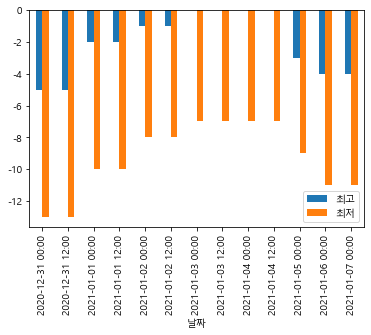

In [27]:
seoul.plot(kind='bar')
plt.show()

# 8. 여주지역 최저기온이 -10 도 이하인 데이터를 구하시오.

In [28]:
kdf[kdf['최저']<=-10].loc['여주']

,날씨,최저,최고,느낌
날짜,,,,
2020-12-31 00:00,맑음,-14,-4,보통
2020-12-31 12:00,맑음,-14,-4,보통
2021-01-01 00:00,맑음,-11,-2,보통
2021-01-01 12:00,맑음,-11,-2,보통
2021-01-06 00:00,맑음,-12,-3,보통
2021-01-07 00:00,맑음,-12,-3,보통


In [29]:
# 쿼리문으로 한다면

kdf.loc['여주'].query('최저<=-10')

,날씨,최저,최고,느낌
날짜,,,,
2020-12-31 00:00,맑음,-14,-4,보통
2020-12-31 12:00,맑음,-14,-4,보통
2021-01-01 00:00,맑음,-11,-2,보통
2021-01-01 12:00,맑음,-11,-2,보통
2021-01-06 00:00,맑음,-12,-3,보통
2021-01-07 00:00,맑음,-12,-3,보통


# 9. 여주지역 전체 최고기온 중 최고기온이 0 도 이상이 차지하는비율을 구하시요.
# (예를들어  출력결과:0도이상 15% )


In [30]:
# len은 null을 포함하면서 센다

zeroCount = len(kdf.loc['여주'].query('최고>=0')) 
total = len(kdf.loc['여주'])
ratio = (zeroCount / total)*100
print(round(ratio, 2))

46.15


# 10. 일교차 컬럼을 추가하고,최고기온과 최저기온의 차이가 가장 높은 도시,날짜,최저,최고,일교차를 구하시요


In [31]:
kdf['일교차'] = kdf['최고'] - kdf['최저']
kdf

날씨  최저  최고  느낌  일교차
도시  날짜                                   
서울  2020-12-31 00:00  맑음 -13  -5  보통    8
    2020-12-31 12:00  맑음 -13  -5  보통    8
    2021-01-01 00:00  맑음 -10  -2  보통    8
    2021-01-01 12:00  맑음 -10  -2  보통    8
    2021-01-02 00:00  맑음  -8  -1  보통    7
    2021-01-02 12:00  맑음  -8  -1  보통    7
    2021-01-03 00:00  맑음  -7   0  보통    7
    2021-01-03 12:00  맑음  -7   0  보통    7
    2021-01-04 00:00  맑음  -7   0  보통    7
    2021-01-04 12:00  맑음  -7   0  보통    7
    2021-01-05 00:00  맑음  -9  -3  보통    6
    2021-01-06 00:00  맑음 -11  -4  보통    7
    2021-01-07 00:00  맑음 -11  -4  보통    7
인천  2020-12-31 00:00  맑음 -11  -4  보통    7
    2020-12-31 12:00  맑음 -11  -4  보통    7
    2021-01-01 00:00  맑음  -9  -2  보통    7
    2021-01-01 12:00  맑음  -9  -2  보통    7
    2021-01-02 00:00  맑음  -7  -1  보통    6
    2021-01-02 12:00  맑음  -7  -1  보통    6
    2021-01-03 00:00  맑음  -6   0  보통    6
    2021-01-03 12:00  맑음  -6   0  보통    6
    2021-01-04 00:00  맑음  -6   0  보통    6
    2021-01-04 12:00  맑음  -6   0  보통    6
    2021-01-05 00:00  맑음  -8  -3  보통    5
    2021-01-06 00:00  맑음  -9  -4  보통    5
    2021-01-07 00:00  맑음  -9  -3  보통    6
수원  2020-12-31 00:00  맑음 -13  -4  보통    9
    2020-12-31 12:00  맑음 -13  -4  보통    9
    2021-01-01 00:00  맑음 -10  -2  보통    8
    2021-01-01 12:00  맑음 -10  -2  보통    8
    2021-01-02 00:00  맑음  -8   0  보통    8
    2021-01-02 12:00  맑음  -8   0  보통    8
    2021-01-03 00:00  맑음  -8   1  보통    9
    2021-01-03 12:00  맑음  -8   1  보통    9
    2021-01-04 00:00  맑음  -7   0  보통    7
    2021-01-04 12:00  맑음  -7   0  보통    7
    2021-01-05 00:00  맑음  -9  -2  보통    7
    2021-01-06 00:00  맑음 -11  -3  보통    8
    2021-01-07 00:00  맑음 -10  -3  보통    7
파주  2020-12-31 00:00  맑음 -17  -5  보통   12
    2020-12-31 12:00  맑음 -17  -5  보통   12
    2021-01-01 00:00  맑음 -15  -3  보통   12
    2021-01-01 12:00  맑음 -15  -3  보통   12
    2021-01-02 00:00  맑음 -13  -1  보통   12
    2021-01-02 12:00  맑음 -13  -1  보통   12
    2021-01-03 00:00  맑음 -13  -2  보통   11
    2021-01-03 12:00  맑음 -13  -2  보통   11
    2021-01-04 00:00  맑음 -13  -2  보통   11
    2021-01-04 12:00  맑음 -13  -2  보통   11
    2021-01-05 00:00  맑음 -12  -3  보통    9
    2021-01-06 00:00  맑음 -15  -4  보통   11
    2021-01-07 00:00  맑음 -15  -4  보통   11
이천  2020-12-31 00:00  맑음 -14  -4  보통   10
    2020-12-31 12:00  맑음 -14  -4  보통   10
    2021-01-01 00:00  맑음 -12  -2  보통   10
    2021-01-01 12:00  맑음 -12  -2  보통   10
    2021-01-02 00:00  맑음 -10   0  보통   10
    2021-01-02 12:00  맑음 -10   0  보통   10
    2021-01-03 00:00  맑음 -10   0  보통   10
    2021-01-03 12:00  맑음 -10   0  보통   10
    2021-01-04 00:00  맑음 -10  -1  보통    9
    2021-01-04 12:00  맑음 -10  -1  보통    9
    2021-01-05 00:00  맑음 -11  -2  보통    9
    2021-01-06 00:00  맑음 -12  -3  보통    9
    2021-01-07 00:00  맑음 -13  -3  보통   10
평택  2020-12-31 00:00  맑음 -12  -3  보통    9
    2020-12-31 12:00  맑음 -12  -3  보통    9
    2021-01-01 00:00  맑음  -9   0  보통    9
    2021-01-01 12:00  맑음  -9   0  보통    9
    2021-01-02 00:00  맑음  -7   1  보통    8
    2021-01-02 12:00  맑음  -7   1  보통    8
    2021-01-03 00:00  맑음  -7   0  보통    7
    2021-01-03 12:00  맑음  -7   0  보통    7
    2021-01-04 00:00  맑음  -7  -1  보통    6
    2021-01-04 12:00  맑음  -7  -1  보통    6
    2021-01-05 00:00  맑음  -8  -2  보통    6
    2021-01-06 00:00  맑음 -11  -3  보통    8
    2021-01-07 00:00  맑음 -10  -3  보통    7
백령도 2020-12-31 00:00  맑음  -7  -4  보통    3
    2020-12-31 12:00  맑음  -7  -4  보통    3
    2021-01-01 00:00  맑음  -5  -2  보통    3
    2021-01-01 12:00  맑음  -5  -2  보통    3
    2021-01-02 00:00  맑음  -5   1  보통    6
    2021-01-02 12:00  맑음  -5   1  보통    6
    2021-01-03 00:00  맑음  -2   0  보통    2
    2021-01-03 12:00  맑음  -2   0  보통    2
    2021-01-04 00:00  맑음  -4  -1  보통    3
    2021-01-04 12:00  맑음  -4  -1  보통    3
    2021-01-05 00:00  맑음  -4  -1  보통    3
    2021-01-06 00:00  맑음  -6  -1  보통    5
    2021-01-07 00:00  맑음  -5  -2  보통    3
과천  2020-12-31 00:00  맑음 -13  -4  보통    9
    2020-12-31 12:00  맑음 -13  -4  보통    9
    2021-01-01 00:00  맑음 -10   0

In [32]:
kdf.nlargest(1, '일교차', keep='all')

날씨  최저  최고  느낌  일교차
도시 날짜                                   
가평 2020-12-31 00:00  맑음 -18  -4  보통   14
   2020-12-31 12:00  맑음 -18  -4  보통   14
   2021-01-02 00:00  맑음 -13   1  보통   14
   2021-01-02 12:00  맑음 -13   1  보통   14

# 부산 데이터

In [35]:
kdf

,도시,날짜,날씨,최저,최고
0,서울,2020-12-31 00:00,맑음,-13,-5
1,서울,2020-12-31 12:00,맑음,-13,-5
2,서울,2021-01-01 00:00,맑음,-10,-2
3,서울,2021-01-01 12:00,맑음,-10,-2
4,서울,2021-01-02 00:00,맑음,-8,-1
5,서울,2021-01-02 12:00,맑음,-8,-1
6,서울,2021-01-03 00:00,맑음,-7,0
7,서울,2021-01-03 12:00,맑음,-7,0
8,서울,2021-01-04 00:00,맑음,-7,0
9,서울,2021-01-04 12:00,맑음,-7,0


In [ ]:
kdf.loc['부산']